<a href="https://colab.research.google.com/github/BlackHazard111/DL-Lab/blob/main/Pr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Model compilation complete.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9117 - loss: 0.2963 - val_accuracy: 0.9826 - val_loss: 0.0542
Model training complete.


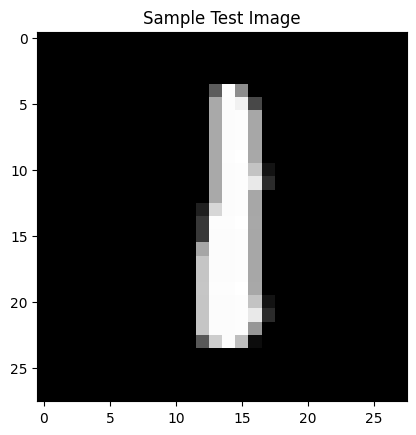

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35

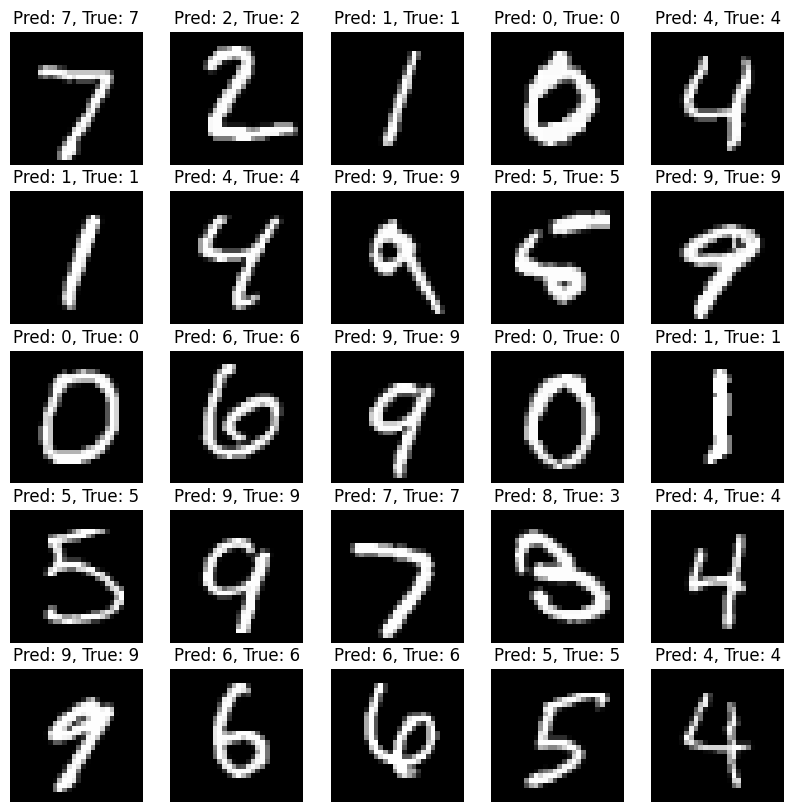

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# 1. Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Rename test_images and test_labels to x_test and y_test for consistency with the original code
x_test = test_images
y_test = test_labels

train_images = train_images / 255.0
x_test = x_test / 255.0

train_images = train_images.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

print("Training images shape:", train_images.shape)
print("Testing images shape:", x_test.shape)


# 2. Build the neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


# 3. Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compilation complete.")

# 4. Train the model
history = model.fit(train_images, train_labels, epochs=1, # Reduced epochs for faster execution
                    validation_data=(x_test, y_test))

print("Model training complete.")

# Predicting a sample image
# Pick a random test image
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]

# Show the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray') # Reshape for displaying
plt.title("Sample Test Image")
plt.show()

# Predict the digit
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = np.argmax(prediction)

print(f"Predicted Digit: {predicted_class}")

# Visualize the first 25 test images with predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray') # Reshape for displaying
    prediction = model.predict(np.expand_dims(x_test[i], axis=0))
    predicted_label = np.argmax(prediction)
    true_label = y_test[i] # Use y_test for true label
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis('off')
plt.show()